0
0
0
10
20
30
40
50
60
70
80
90
100
110
120


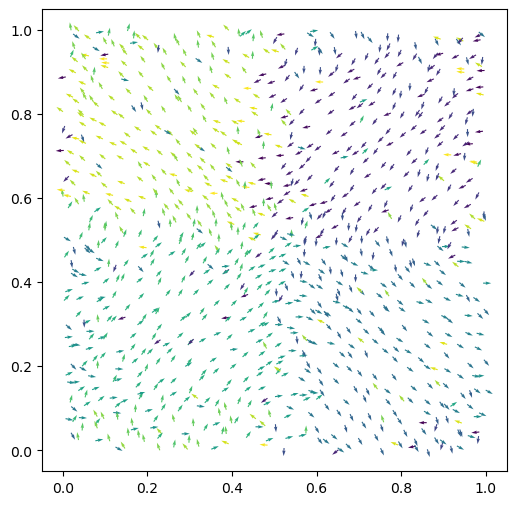

In [20]:
from discrete.utils import load
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

dataset = 'sim_n1024_1i10^0.5_2i10^0.0.npy'
vid_file = '3_1.mp4'
pos, vs, deltat, dims = load(dataset, 4)

fig, ax = plt.subplots(figsize=(6, 6))
qv = ax.quiver(pos[:, 0, -1], pos[:, 1, -1], 1, 0, clim=[-np.pi, np.pi])

def animate(i):
    if i % 10 == 0:
        print(i)
    qv.set_offsets(pos[:, :, i])
    norms = np.sqrt(vs[:, 0, i] ** 2 + vs[:, 1, i] ** 2)
    qv.set_UVC(vs[:, 0, i] / norms, vs[:, 1, i] / norms, np.angle(vs[:, 0, i] + 1.0j * vs[:, 1, i]))
    return qv,

anim = FuncAnimation(fig, animate, np.arange(0, pos.shape[-1]), interval=1, blit=True)
anim.save(vid_file, fps=30, extra_args=['-vcodec', 'libx264'])